# Import Libraries

In [40]:
# Install yfinance and prophet libraries
!pip install yfinance
!pip install prophet

# Import yfinance, datetime, pandas, plotly, prophet libraries
import yfinance as yf
from datetime import datetime
import pandas as pd
import plotly.express as px
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_plotly
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import json
from prophet.serialize import model_to_json, model_from_json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In the code block above, we first install the yfinance and prophet libraries using pip, which allows us to access financial data from Yahoo Finance and to use the Prophet forecasting algorithm.

Then we import yfinance, datetime, pandas, plotly, prophet, and other relevant libraries using the import statement.

The plotly library is a popular library for creating interactive plots and visualizations in Python. The prophet library provides a powerful algorithm for time-series forecasting, which we will be using in this code block. We also import the json library to serialize and deserialize Prophet models.

# Data Analysis

In [41]:
# Define the stock symbol and start date for data collection
symbol= 'TSLA'
start_date = datetime(2018, 1, 1)

# Download data from YahooFinance API for the given stock symbol and start date
df = yf.download(symbol, start=start_date)


# Save the downloaded data to a CSV file
df.to_csv('TSLA.csv')

# Read the saved CSV file into a Pandas DataFrame for further analysis
hist=pd.read_csv('TSLA.csv')

[*********************100%***********************]  1 of 1 completed


In [42]:
# Print the last 5 rows of hist dataframe
hist.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1316,2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
1317,2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600
1318,2023-03-29,193.130005,195.289993,189.440002,193.880005,193.880005,123660000
1319,2023-03-30,195.580002,197.330002,194.419998,195.279999,195.279999,110252200
1320,2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500


In [43]:
# Print the first 5 rows of hist dataframe
hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [44]:
# Select the Date and Close columns from hist dataframe
hist = hist[['Date', 'Close']].copy()

# Rename the Date and Close columns as 'ds' and 'y', respectively
hist = hist.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')

# Print the last 5 rows of hist dataframe
hist.tail()


,ds,y
1316,2023-03-27,191.809998
1317,2023-03-28,189.190002
1318,2023-03-29,193.880005
1319,2023-03-30,195.279999
1320,2023-03-31,207.460007


In the code block above, we select only the Date and Close columns from the hist dataframe using the double bracket indexing syntax. The .copy() method is used to make a copy of the resulting dataframe, so that any changes made to the new dataframe do not affect the original hist dataframe.

Next, we use the .rename() method to rename the Date column as ds and the Close column as y. The axis='columns' parameter is used to indicate that we are renaming column names rather than row names.

Finally, we print the last 5 rows of the hist dataframe using the .tail() method to confirm that the column names have been updated correctly.

In [45]:
# Create a line plot using plotly express
fig = px.line(hist, x='ds', y='y', title='Stock Price change over time')
fig.show()

# Model training

In [46]:
# Create a Prophet model
m = Prophet()

# Fit the model to the historical data
m=m.fit(hist)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/16g6xqs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/og8jvcbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31621', 'data', 'file=/tmp/tmpfnr5yu35/16g6xqs3.json', 'init=/tmp/tmpfnr5yu35/og8jvcbd.json', 'output', 'file=/tmp/tmpfnr5yu35/prophet_model2o34q0p2/prophet_model-20230402022910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Predict future based on trained model

In [47]:
# Generate a dataframe with future dates to forecast
future = m.make_future_dataframe(periods=30)

# Generate a forecast for the future dates
forecast = m.predict(future)

# Display all columns of the forecast dataframe
pd.options.display.max_columns = None

# Print the last 5 rows of the forecast dataframe
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1346,2023-04-26,141.134777,111.651809,175.462163,140.918644,141.334216,3.349912,3.349912,3.349912,0.064214,0.064214,0.064214,3.285698,3.285698,3.285698,0.0,0.0,0.0,144.484689
1347,2023-04-27,140.717564,109.919212,174.242885,140.485538,140.953003,2.190884,2.190884,2.190884,-0.406524,-0.406524,-0.406524,2.597407,2.597407,2.597407,0.0,0.0,0.0,142.908447
1348,2023-04-28,140.300351,108.669943,173.170452,140.008280,140.560245,0.947250,0.947250,0.947250,-0.865126,-0.865126,-0.865126,1.812376,1.812376,1.812376,0.0,0.0,0.0,141.247600
1349,2023-04-29,139.883137,105.767443,171.163154,139.547590,140.182151,1.190600,1.190600,1.190600,0.262618,0.262618,0.262618,0.927982,0.927982,0.927982,0.0,0.0,0.0,141.073737
1350,2023-04-30,139.465924,108.321256,173.883894,139.092435,139.789398,0.206640,0.206640,0.206640,0.262619,0.262619,0.262619,-0.055979,-0.055979,-0.055979,0.0,0.0,0.0,139.672564


In [48]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-02,25.426919
1,2018-01-03,26.613337
2,2018-01-04,27.073046
3,2018-01-05,27.499445
4,2018-01-08,31.435838
...,...,...
1346,2023-04-26,144.484689
1347,2023-04-27,142.908447
1348,2023-04-28,141.247600
1349,2023-04-29,141.073737


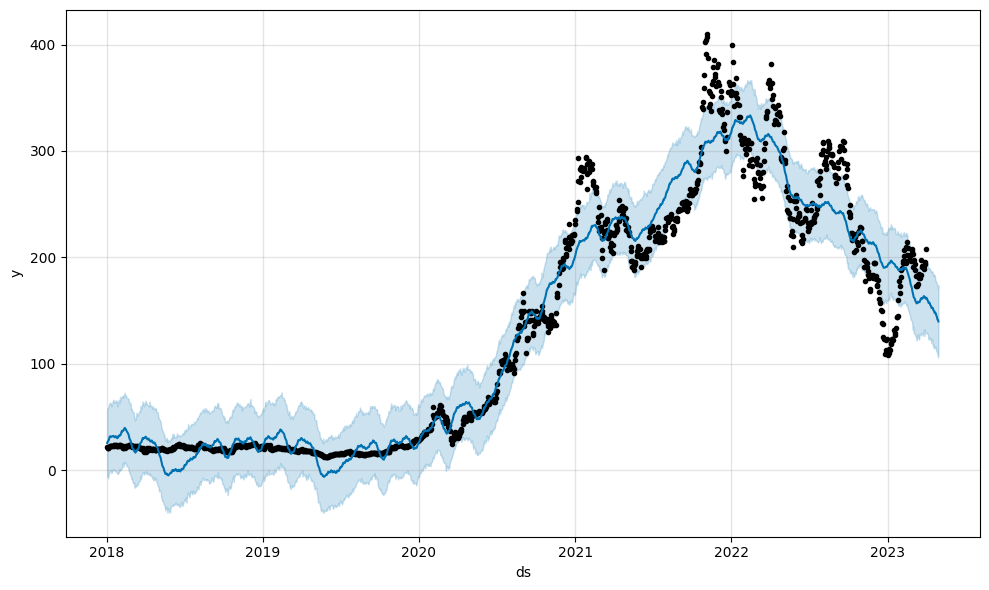

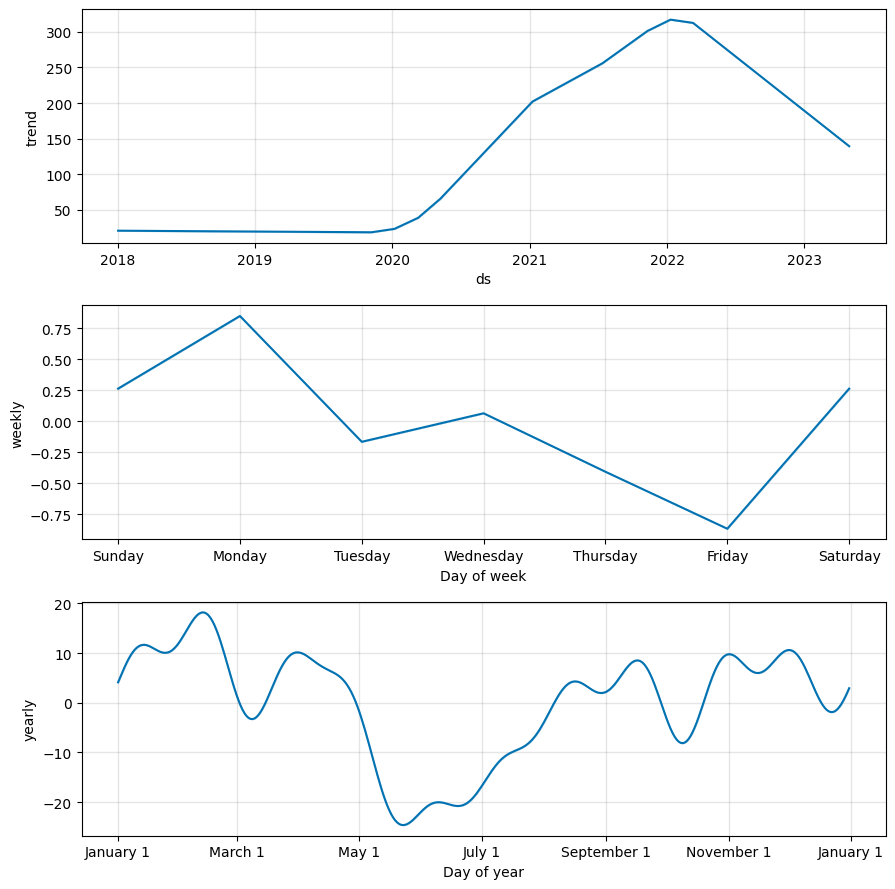

In [49]:
figure1 = m.plot(forecast)
figure2 = m.plot_components(forecast)

In [50]:
plot_plotly(m, forecast)

# Cross Validaton

In order for us to find out how our model performs and know if we are making progress we need some kind of validation. Prophet includes functionality for time series cross validation to measure forecast error using historical data.

This cross validation procedure can be done automatically for a range of historical cutoffs using the `cross_validation` function. We specify,

* `horizon` - the forecast horizon
* `initial` - the size of the initial training period
* `period `- the spacing between cutoff dates
By default, the initial training period is set to three times the horizon, and cutoffs (period) are made every half a horizon.

The resulting dataframe can now be used to compute error measures of yhat vs. y.

Here we do cross-validation to assess prediction performance on a horizon of 180 days, starting with 540 days of training data in the first cutoff and then making predictions every 31 days.

In [51]:
df_cv = cross_validation(m, initial='150 days', period='15 days', horizon = '50 days')

INFO:prophet:Making 115 forecasts with cutoffs between 2018-06-05 00:00:00 and 2023-02-09 00:00:00


  0%|          | 0/115 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/s0nyi01h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/h_6ttts4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53046', 'data', 'file=/tmp/tmpfnr5yu35/s0nyi01h.json', 'init=/tmp/tmpfnr5yu35/h_6ttts4.json', 'output', 'file=/tmp/tmpfnr5yu35/prophet_modeliy1c_dum/prophet_model-20230402022913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/cwqqa3u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnr5yu35/vyegthtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

# Performance Metrics

https://facebook.github.io/prophet/docs/diagnostics.html

Prophet comes with some built-in performance metrics, The performance metrics available are:

* `mse:` mean absolute error
* `rmse:` mean squared error
* `mae:` Mean average error
* `mape:` Mean average percentage error
* `mdape:` Median average percentage error
The code for validating and gathering performance metrics is shown below:

In [52]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,995.321732,31.548720,20.301863,0.138497,0.110991,0.133392,0.302313
1,7 days,957.571614,30.944654,20.045488,0.140050,0.111508,0.134365,0.302937
2,8 days,985.227670,31.388337,20.456262,0.148497,0.115357,0.143887,0.301314
3,9 days,1061.559317,32.581579,21.140451,0.156462,0.110805,0.151937,0.312508
4,10 days,1210.364942,34.790300,22.588858,0.168070,0.122904,0.163050,0.310980


In [53]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
40,46 days,2516.439009,50.164121,33.752971,0.251544,0.195006,0.246382,0.174242
41,47 days,2696.612849,51.928921,35.120033,0.257551,0.208863,0.250893,0.162109
42,48 days,2916.854310,54.007910,36.480695,0.262190,0.216158,0.254962,0.161963
43,49 days,2951.581856,54.328463,36.747535,0.263225,0.219362,0.258757,0.158413
44,50 days,2822.229747,53.124662,36.196249,0.264219,0.220724,0.259711,0.148638


Cross validation performance metrics can be visualized with `plot_cross_validation_metric`, here shown for `RMSE`. 

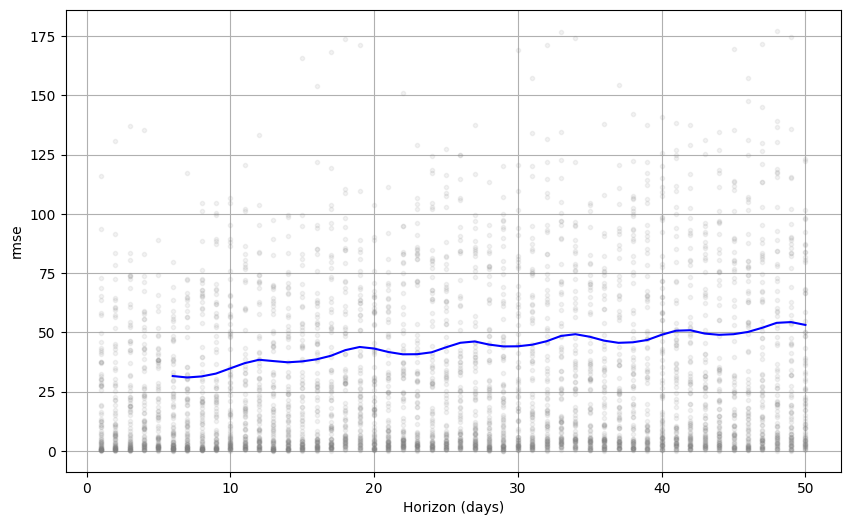

In [54]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [55]:
new_pred_plot = pd.DataFrame({
    'dates': forecast['ds'],
    'predicted price':forecast['yhat']
})

In [56]:
new_pred_plot= new_pred_plot[-30:]
new_pred_plot

,dates,predicted price
1321,2023-04-01,161.968634
1322,2023-04-02,161.494377
1323,2023-04-03,161.535848
1324,2023-04-04,159.921979
1325,2023-04-05,159.503824
1326,2023-04-06,158.351002
1327,2023-04-07,157.187257
1328,2023-04-08,157.597512
1329,2023-04-09,156.877252
1330,2023-04-10,156.747100


In [57]:
jsonresult  = new_pred_plot.to_json(orient='records')

In [58]:
jsonresult

'[{"dates":1680307200000,"predicted price":161.968633531},{"dates":1680393600000,"predicted price":161.4943767701},{"dates":1680480000000,"predicted price":161.5358475669},{"dates":1680566400000,"predicted price":159.9219787683},{"dates":1680652800000,"predicted price":159.5038238747},{"dates":1680739200000,"predicted price":158.3510018803},{"dates":1680825600000,"predicted price":157.1872574552},{"dates":1680912000000,"predicted price":157.5975117283},{"dates":1680998400000,"predicted price":156.8772516356},{"dates":1681084800000,"predicted price":156.7470995587},{"dates":1681171200000,"predicted price":155.0312402534},{"dates":1681257600000,"predicted price":154.5734299837},{"dates":1681344000000,"predicted price":153.4337484124},{"dates":1681430400000,"predicted price":152.3245332603},{"dates":1681516800000,"predicted price":152.8178608013},{"dates":1681603200000,"predicted price":152.1954063937},{"dates":1681689600000,"predicted price":152.163511858},{"dates":1681776000000,"predict

In [59]:
with open('data.json', 'w') as f:
    json.dump(jsonresult, f)